In [1]:
conda install matplotlib

Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
    current version: 25.7.0
    latest version: 26.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [2]:
conda install seaborn 

Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
    current version: 25.7.0
    latest version: 26.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




# 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load DataSet

In [4]:
df = pd.read_csv("../data/housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# 3. Basic EDA 

## 3.1 DataSet Info

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## 3.2 Check missing values

In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# 4. Data Visualization

## 4.1 Correlation Heatmap

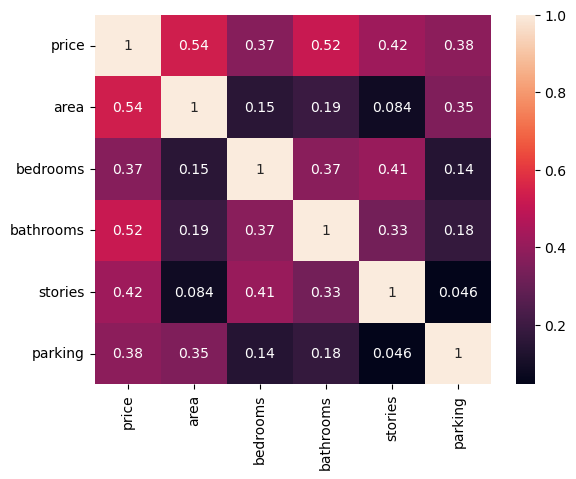

In [7]:
plt.figure()
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)
plt.show()

## 4.2 Price Distribution

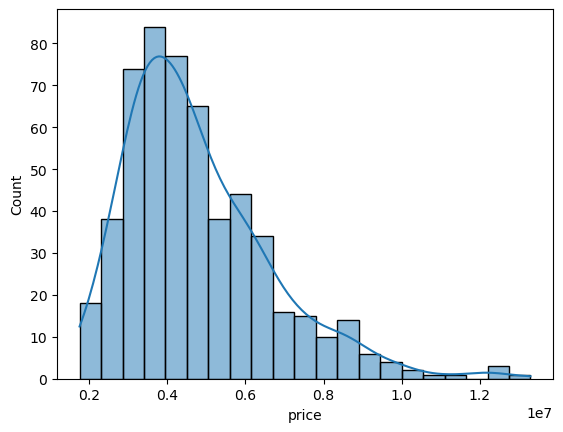

In [8]:
plt.figure()
sns.histplot(df["price"], kde=True)
plt.show()

## 4.3 Area vs Price 

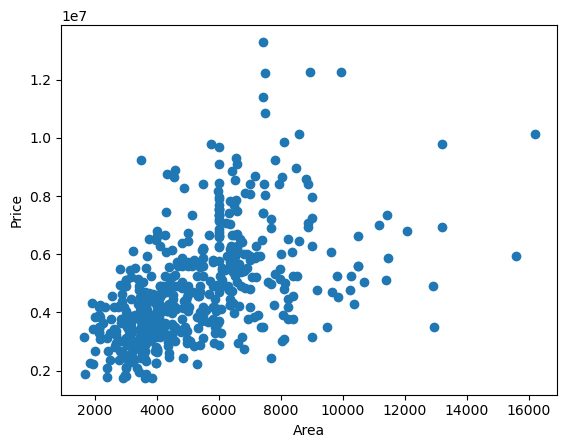

In [9]:
plt.figure()
plt.scatter(df["area"], df["price"])
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

Convert categorical columns

In [10]:
df = pd.get_dummies(df, drop_first=True)

# 5. Feature Selection

In [11]:
X = df.drop("price", axis=1)
y = df["price"]

# 6. Train-Test Split 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# 7. Train Multiple Models 

## 7.1 Linear Regression

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Linear Regression")
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("R2 Score:", r2_score(y_test, lr_pred))

Linear Regression
RMSE: 1324506.9600914388
R2 Score: 0.6529242642153184


## 7.2 Random Forest Regressor(Better Model) 

In [14]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest")
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R2 Score:", r2_score(y_test, rf_pred))

Random Forest
RMSE: 1400565.9728553821
R2 Score: 0.611918531405699


## 7.3 XGBoost

In [15]:
conda install xgboost

Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
    current version: 25.7.0
    latest version: 26.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [22]:
from xgboost import XGBRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

xgb.fit(X_train, y_train)

# Predictions
pred = xgb.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("XGBoost Results")
print("RMSE:", rmse)
print("R2 Score:", r2)


XGBoost Results
RMSE: 1327609.977618427
R2 Score: 0.6512961387634277


# 8. Feature Importance

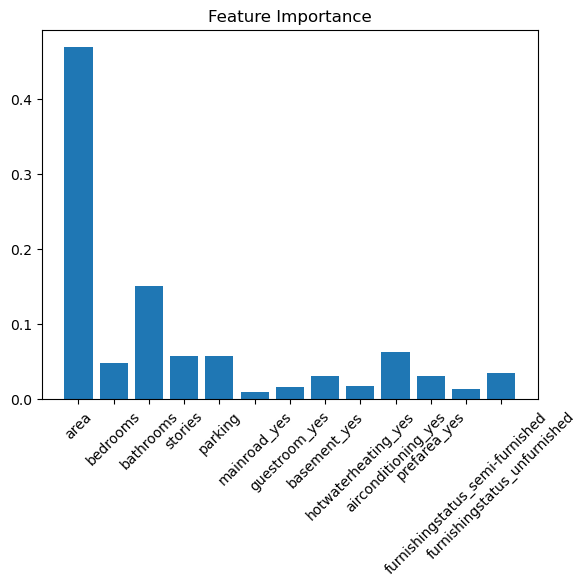

In [17]:
importances = rf.feature_importances_
features = X.columns

plt.figure()
plt.bar(features, importances)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()

# 9. Save best model 

In [24]:
joblib.dump(lr, "../model/model.pkl")

['../model/model.pkl']